## 1. Tree-Based Methods

Import packages

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

### (a) Download the APS Failure data

In [ ]:
train_path = "../data/aps_failure_training_set.csv"
df_train = pd.read_csv(train_path, skiprows=20,  na_values='na')

test_path = "../data/aps_failure_test_set.csv"
df_test = pd.read_csv(test_path, skiprows=20, na_values='na')

X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [ ]:
y_train

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

In [ ]:
print(df_test)
print(df_train)

      class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_0

### (b) Data Preparation



## Here, I will be using mean imputation.


In [ ]:
imputer = SimpleImputer(strategy='mean')

train_imputed = imputer.fit_transform(df_train.iloc[:, 1:])

test_imputed = imputer.transform(df_test.iloc[:, 1:])

train_imputed_df = pd.DataFrame(train_imputed, columns=df_train.columns[1:])
test_imputed_df = pd.DataFrame(test_imputed, columns=df_test.columns[1:])
x_train2 = pd.DataFrame()
x_test2 = pd.DataFrame()

x_train2 = train_imputed_df
x_test2=test_imputed_df
print(x_train2)
data_imp=pd.concat([train_imputed_df,test_imputed_df])

train_imputed_df['class'] = df_train.iloc[:, 0]

test_imputed_df['class'] = df_test.iloc[:, 0]


data_imp2=pd.concat([train_imputed_df,test_imputed_df])
data_imp2

         aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...         ...       ...           ...            ...     ...     ...   
59995  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004  \
0         0.0     0.0     0.0    

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,neg
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,neg
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,neg
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,neg
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.713189,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0,neg
15996,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,neg
15997,79636.0,0.713189,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0,neg
15998,110.0,0.713189,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,neg


#### (ii) Calculate the coefficient of variation

In [ ]:
mean_values = data_imp.mean()
std_dev = data_imp.std()
coefficient_of_variation = std_dev / mean_values
print("Coefficients of variations")
print(coefficient_of_variation)

Coefficients of variations
aa_000      4.328608
ab_000      2.207351
ac_000      2.167798
ad_000    193.955307
ae_000     22.282263
             ...    
ee_007      4.885304
ee_008      3.335353
ee_009      5.754213
ef_000     47.781107
eg_000     45.711130
Length: 170, dtype: float64


#### (iii) Plot a correlation matrix

In [ ]:
correlation_matrix = data_imp.corr()
correlation_matrix

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019562,-0.011690,-0.000472,0.025819,0.036032,0.011681,0.076380,0.195163,0.307446,...,0.414126,0.419913,0.409660,0.419782,0.425680,0.356969,0.259669,0.133764,0.006754,0.010299
ab_000,0.019562,1.000000,-0.010765,0.000076,0.025035,0.043458,0.000576,0.006554,0.023500,0.035739,...,0.024723,0.036606,0.028305,0.033824,0.023791,0.013550,0.001869,0.000198,0.046995,0.075732
ac_000,-0.011690,-0.010765,1.000000,-0.002125,-0.004769,-0.010612,0.015530,-0.002325,-0.009434,-0.022899,...,-0.009843,-0.006467,-0.007988,-0.008137,-0.014707,-0.018666,0.010423,0.017288,-0.006192,0.015826
ad_000,-0.000472,0.000076,-0.002125,1.000000,-0.000204,-0.000245,-0.000038,-0.000020,-0.000063,-0.000173,...,-0.000758,-0.000804,-0.000797,-0.000632,-0.000661,-0.000391,-0.000720,-0.000465,-0.000083,-0.000094
ae_000,0.025819,0.025035,-0.004769,-0.000204,1.000000,0.829986,-0.000440,-0.000604,0.001960,0.020700,...,0.012786,0.019473,0.012878,0.026469,0.066565,0.036649,-0.008379,-0.006947,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013550,-0.018666,-0.000391,0.036649,0.046529,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227099,0.063065,-0.000228,0.000908
ee_008,0.259669,0.001869,0.010423,-0.000720,-0.008379,-0.010821,0.000067,0.005352,0.009108,0.020683,...,0.442532,0.470574,0.448390,0.394021,0.365686,0.227099,1.000000,0.690147,-0.005137,-0.001966
ee_009,0.133764,0.000198,0.017288,-0.000465,-0.006947,-0.008531,-0.001103,-0.003540,-0.009090,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003156,-0.001065
ef_000,0.006754,0.046995,-0.006192,-0.000083,0.063587,0.093474,-0.000075,0.001152,0.005659,0.011098,...,0.003813,0.010263,0.003071,0.027007,0.005384,-0.000228,-0.005137,-0.003156,1.000000,0.222579


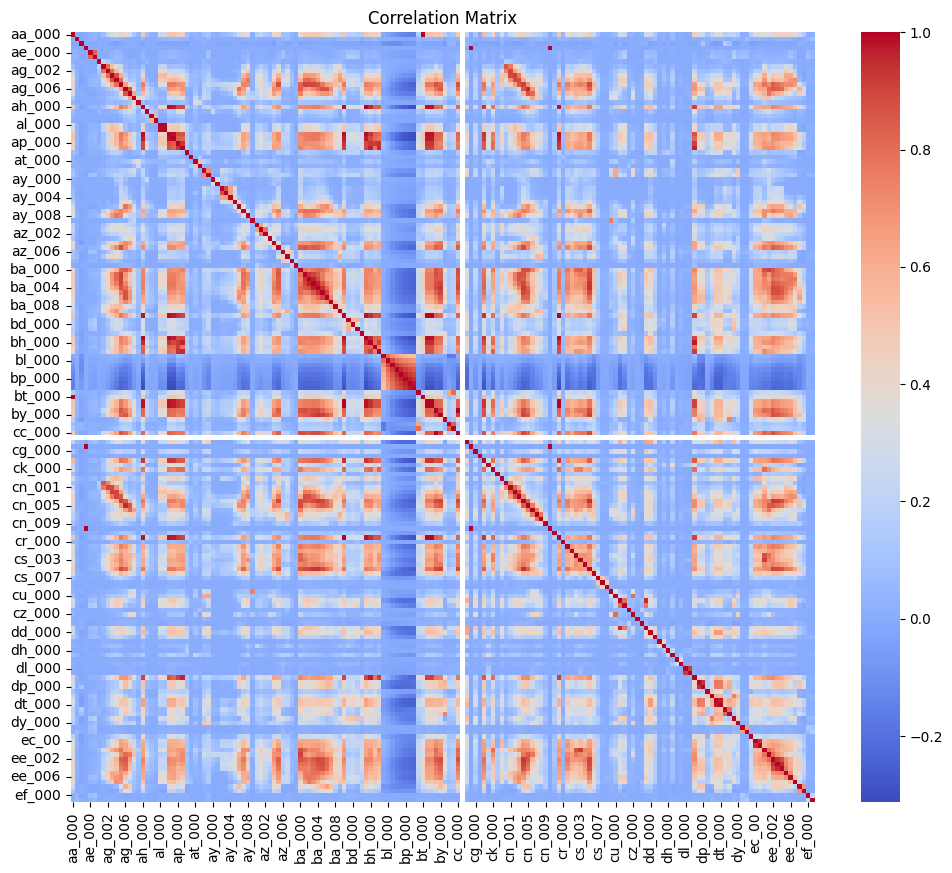

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### (iv) Make scatter plots and box plots

Highest CV features:
['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'df_000', 'as_000', 'dh_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009', 'class']


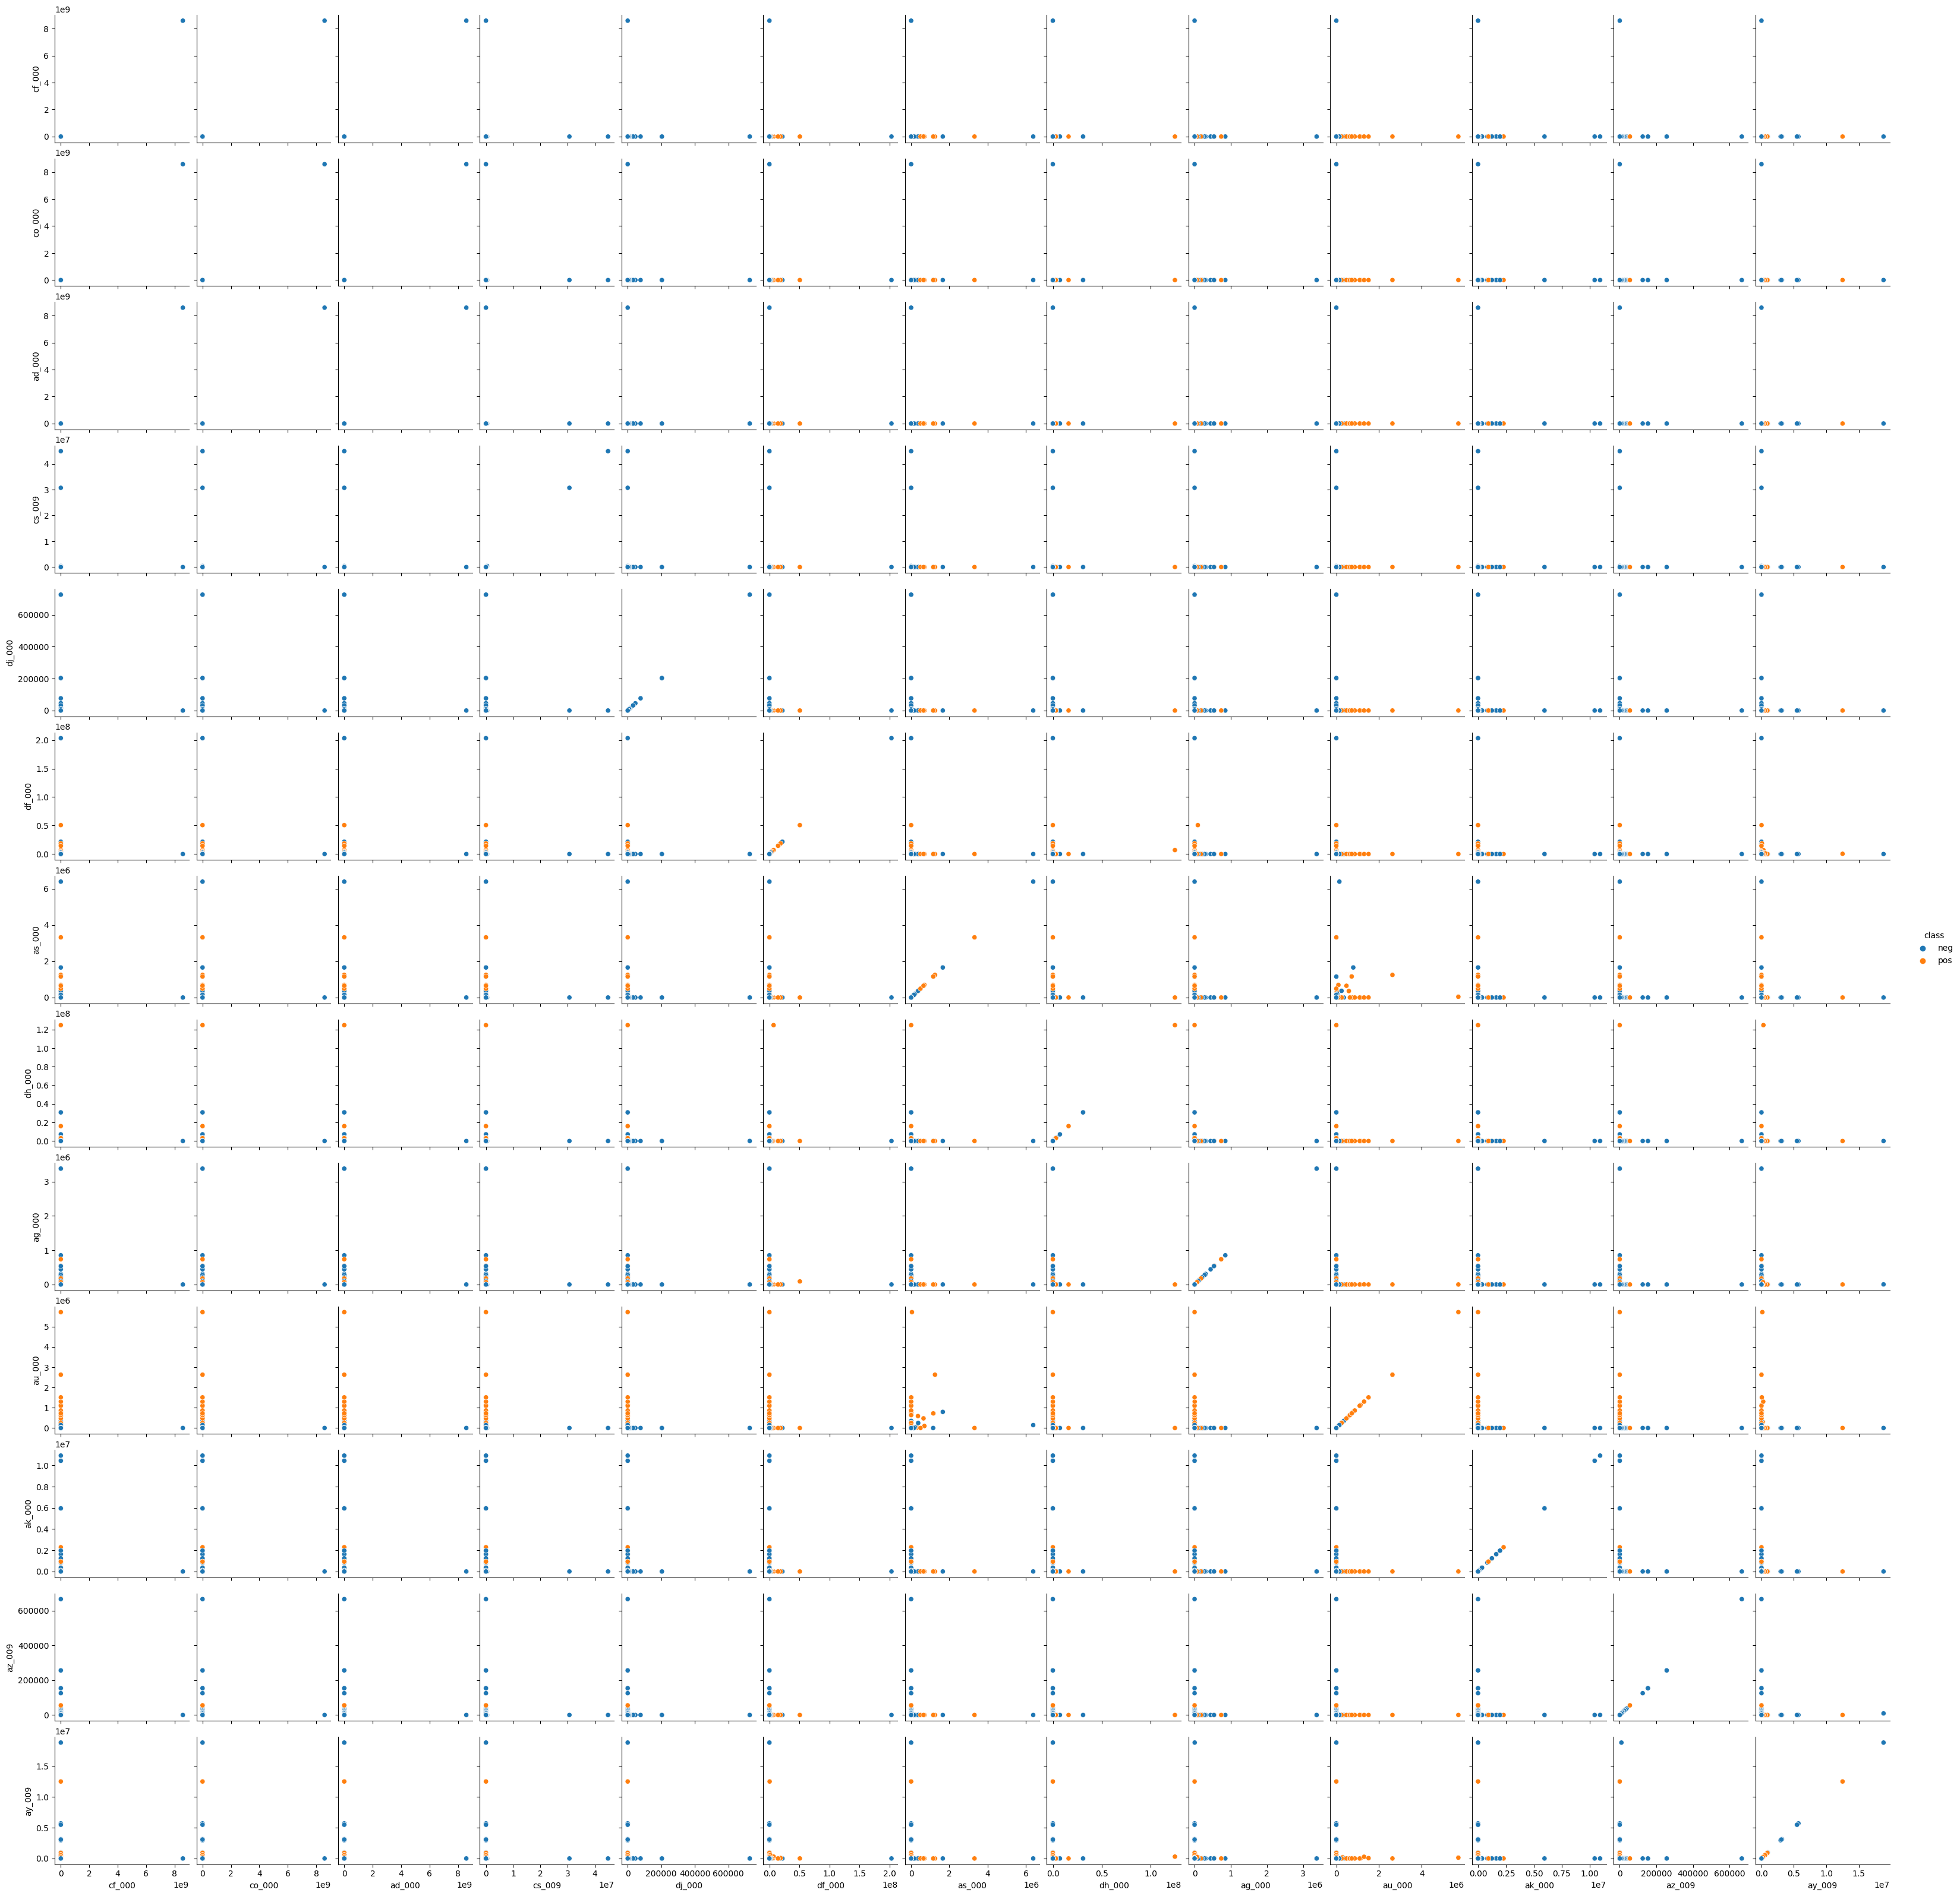

In [ ]:
sorted_features = coefficient_of_variation.sort_values(ascending=False)
top_features = sorted_features.head(int(np.sqrt(170)))
print("Highest CV features:")
feats = []
feats.extend(top_features.index)

feats.append('class')
print(feats)


sns.pairplot(data=data_imp2[feats], diag_kind=None, hue = 'class')
plt.show()


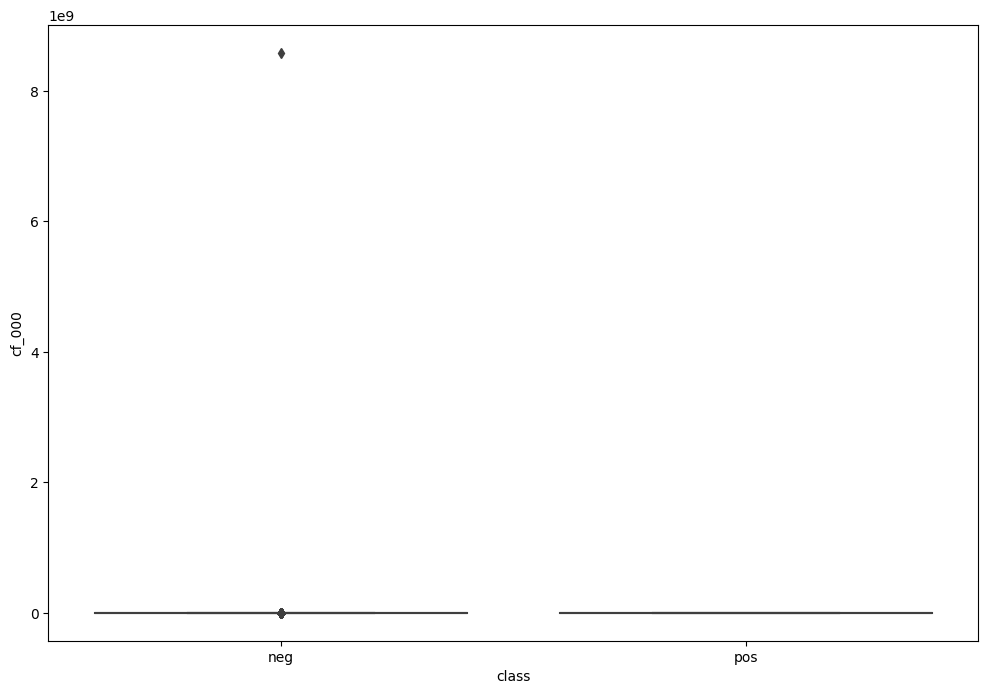

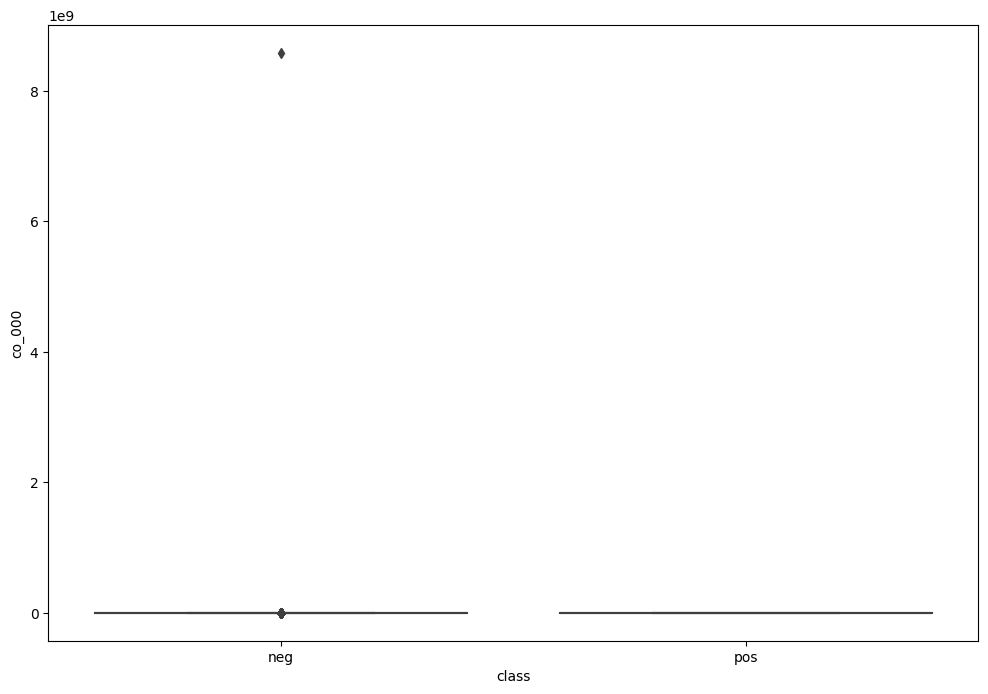

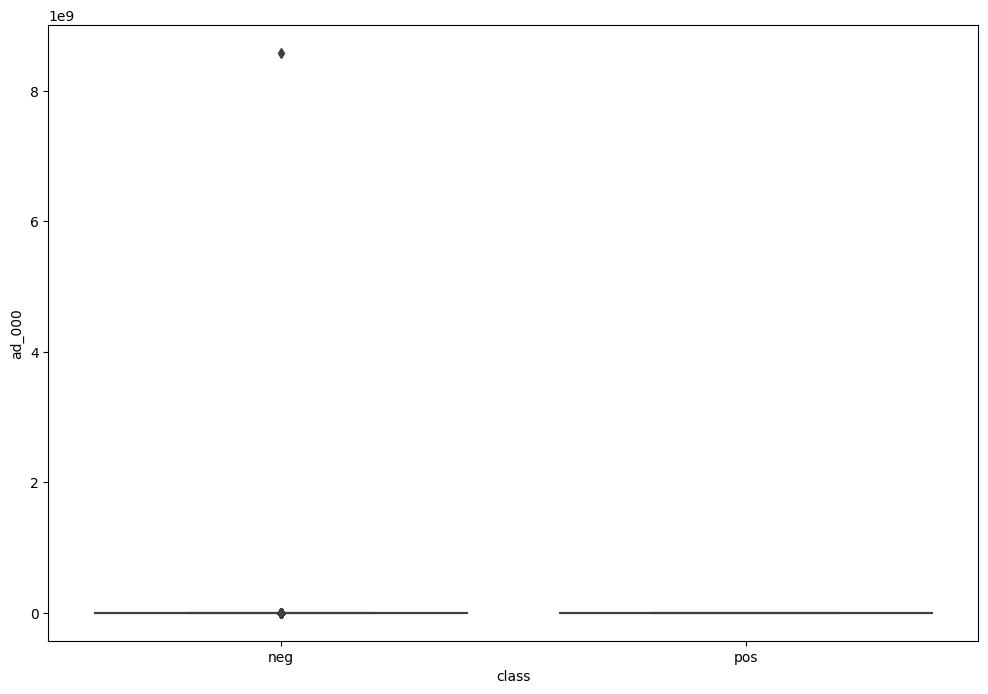

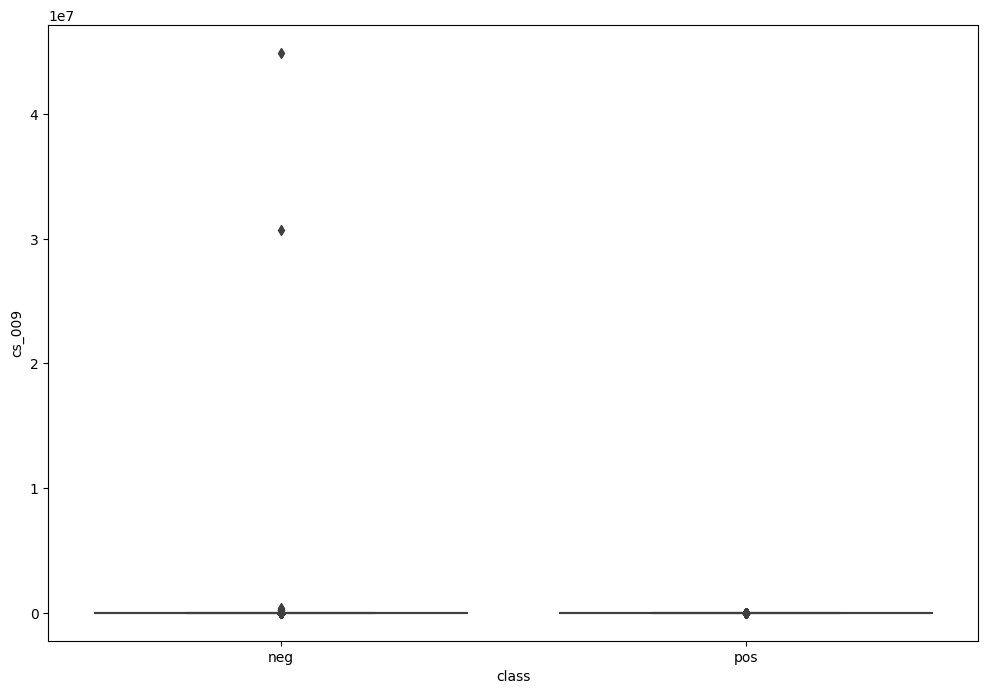

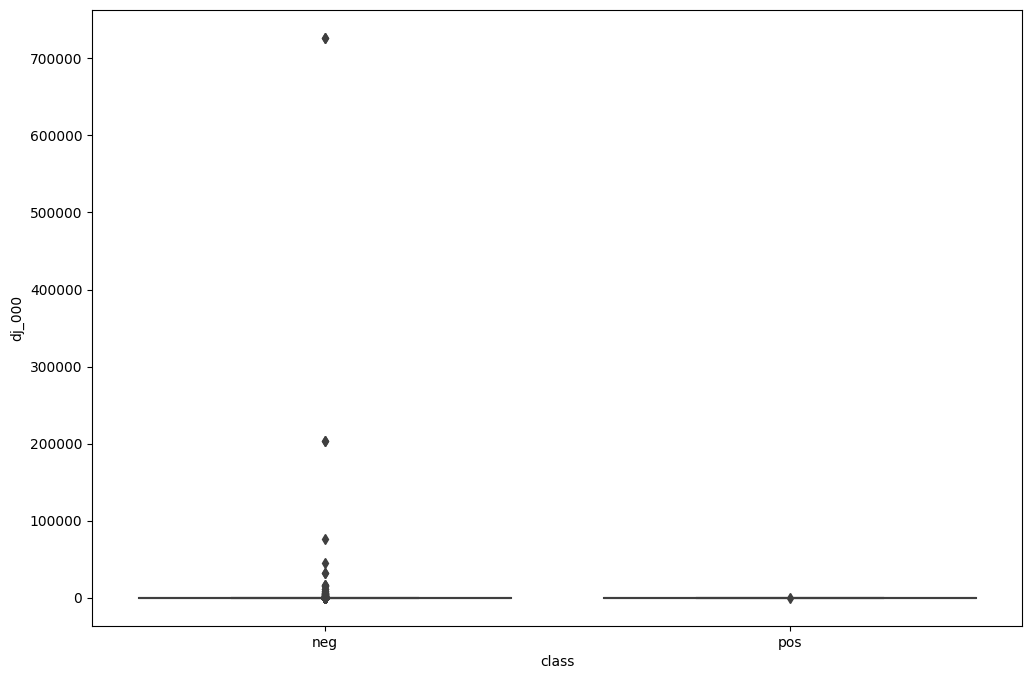

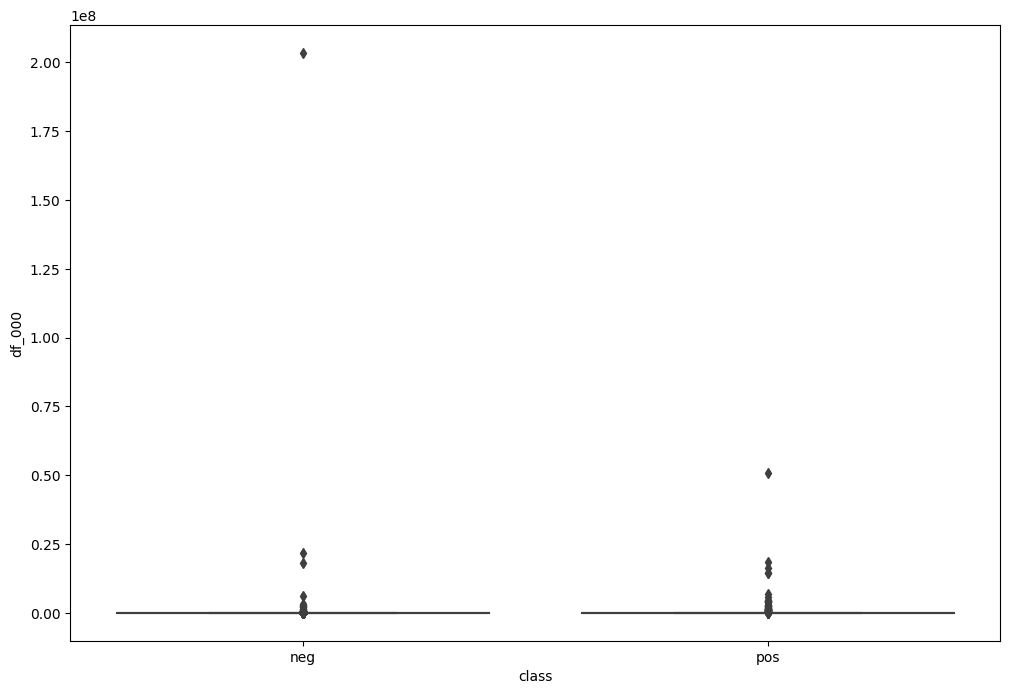

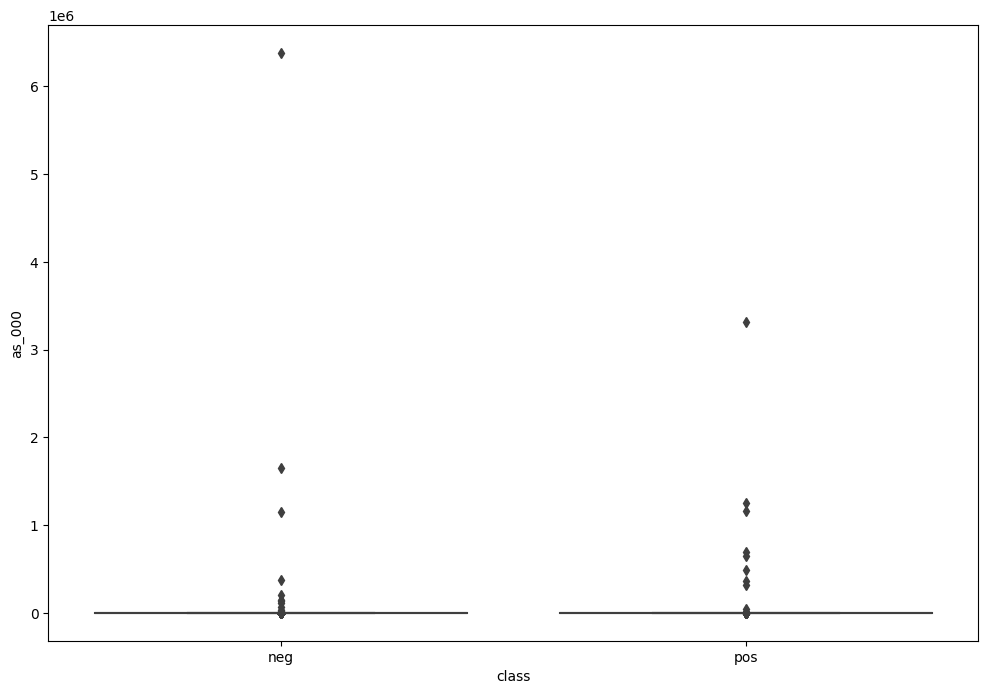

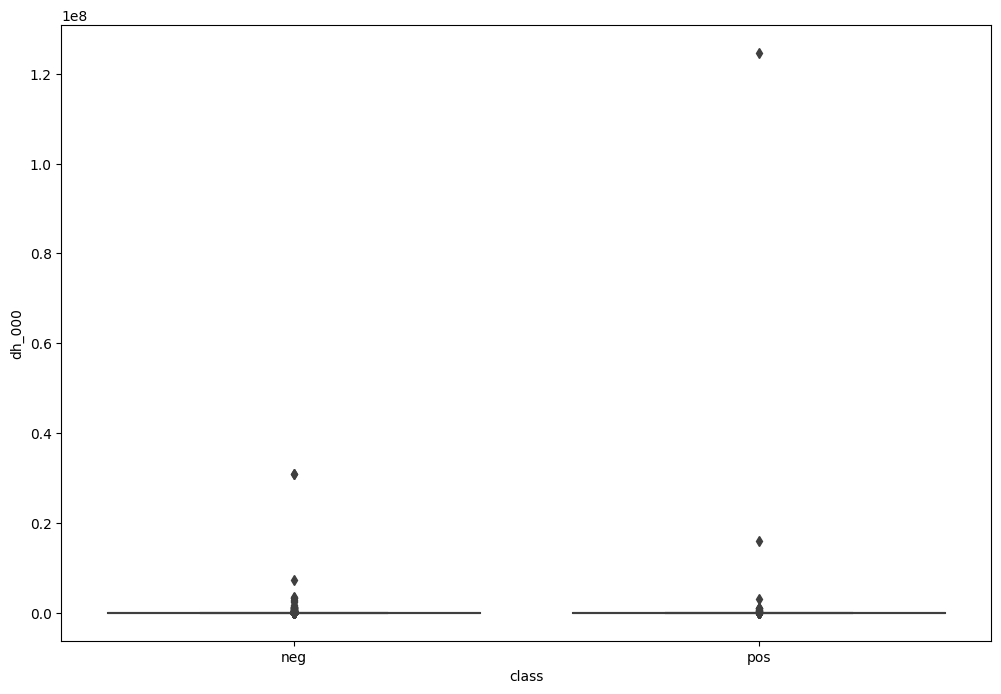

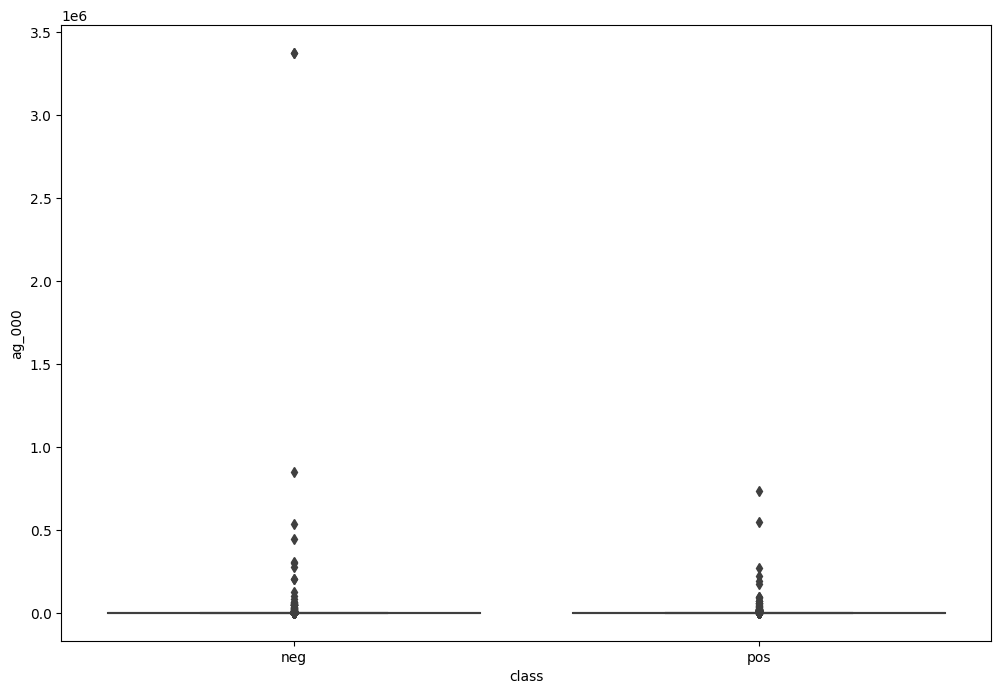

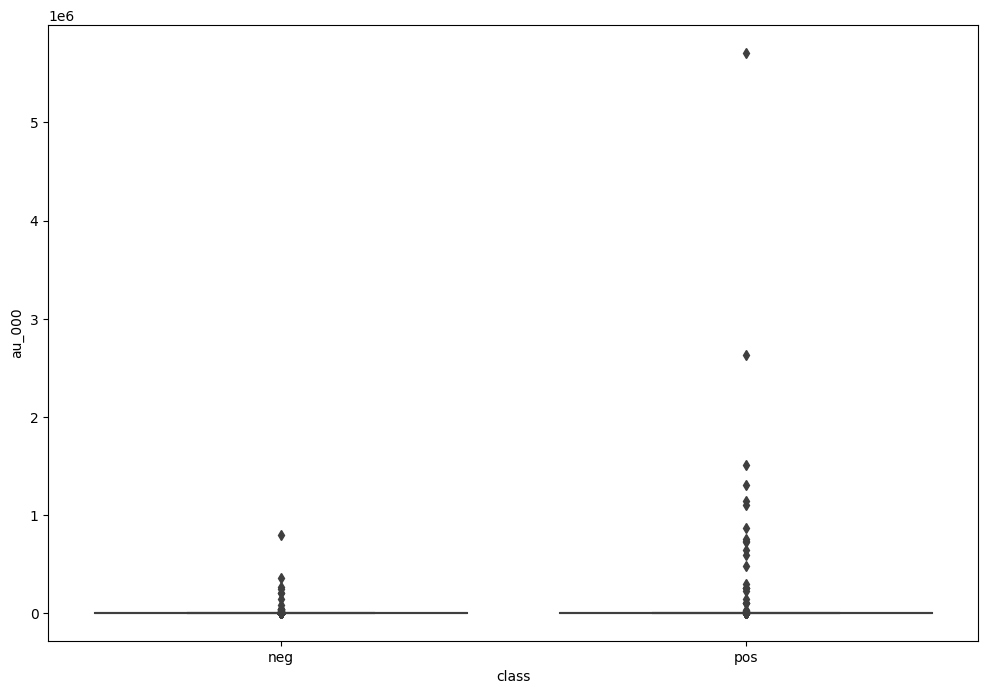

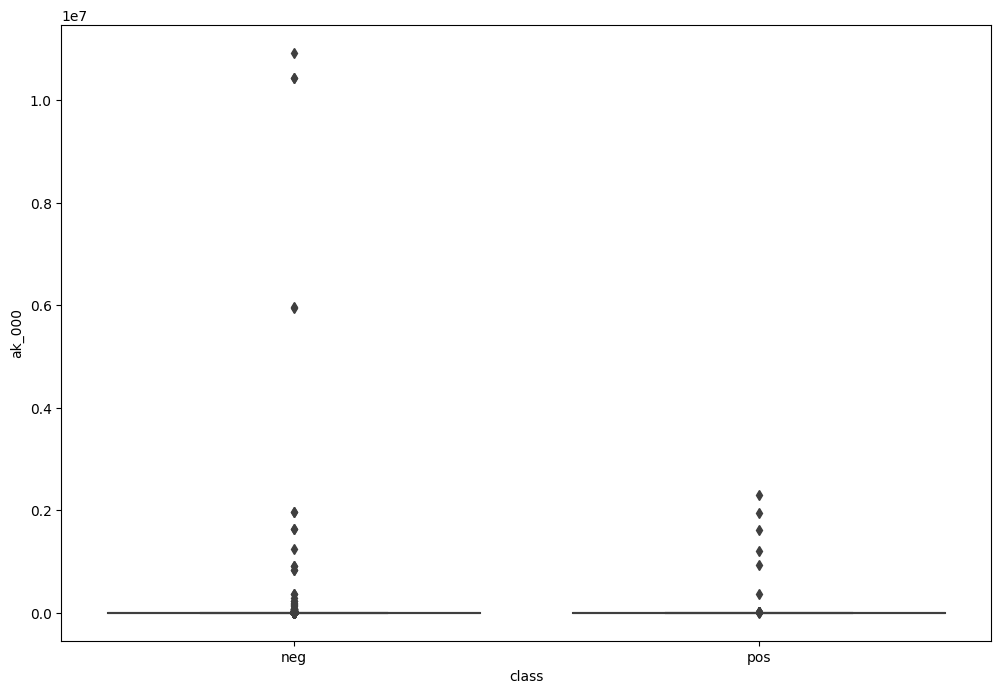

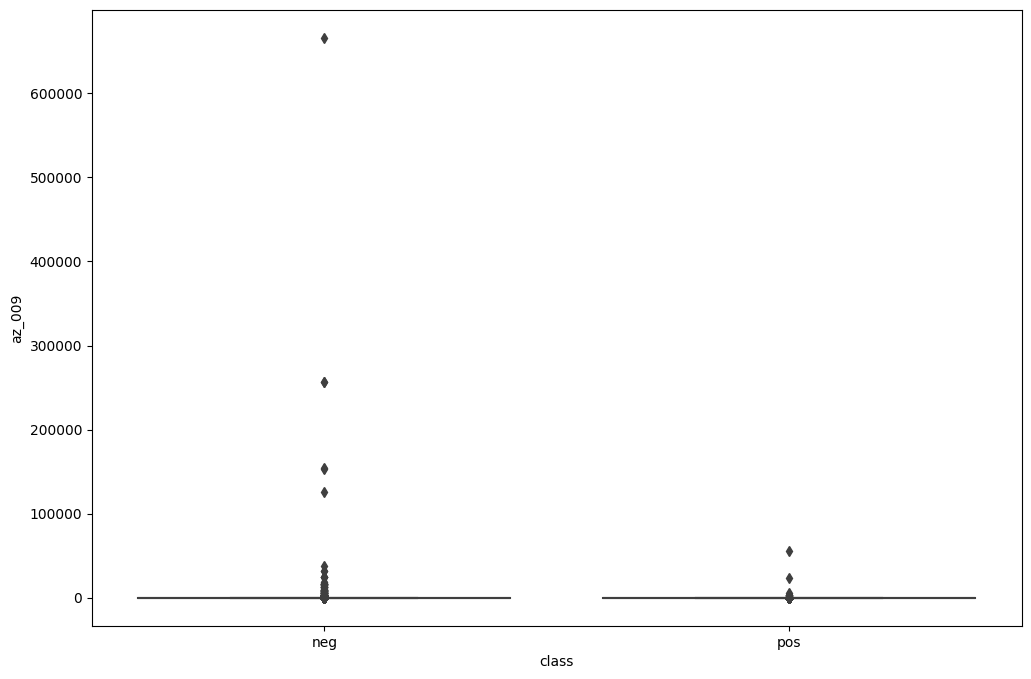

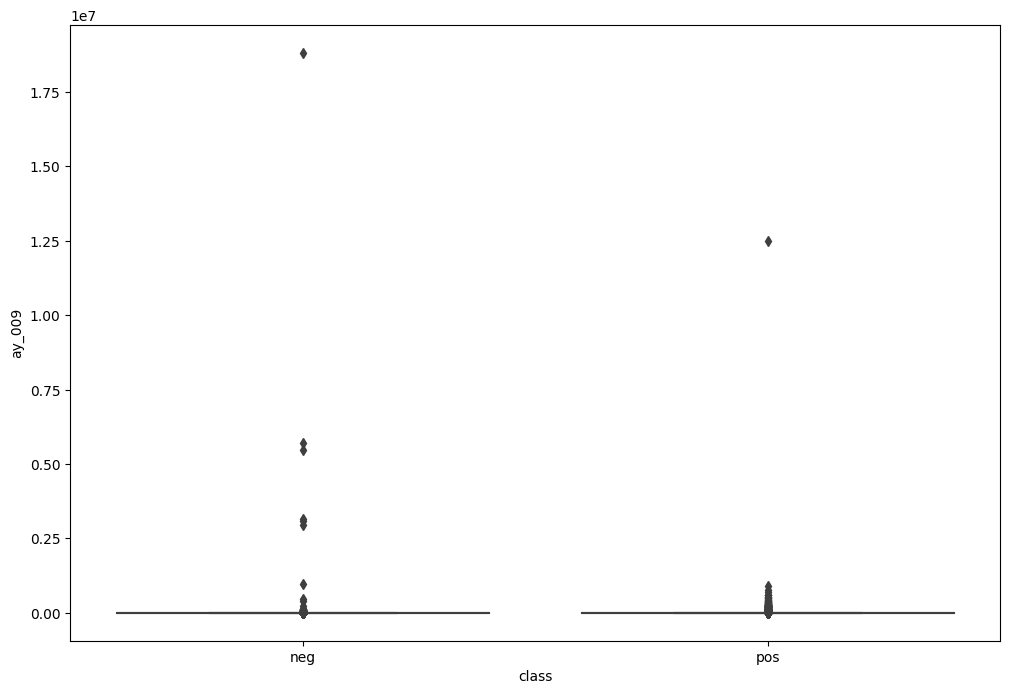

In [ ]:
for feature in top_features.index:
    plt.figure(figsize=(12, 8))
    box = sns.boxplot(x='class', y=feature, data=data_imp2)
    plt.show()

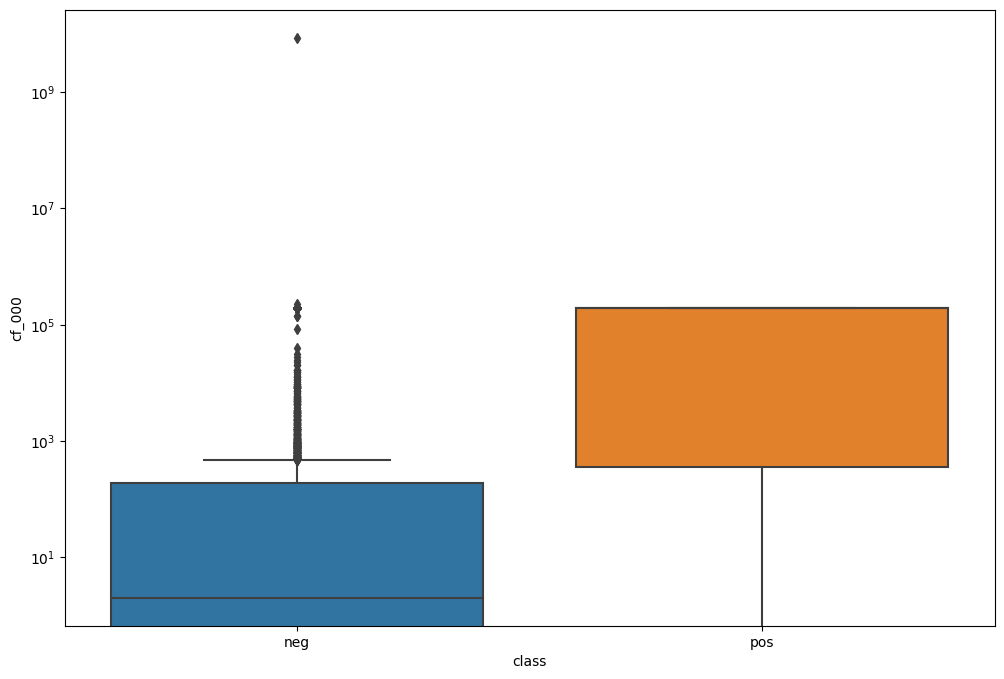

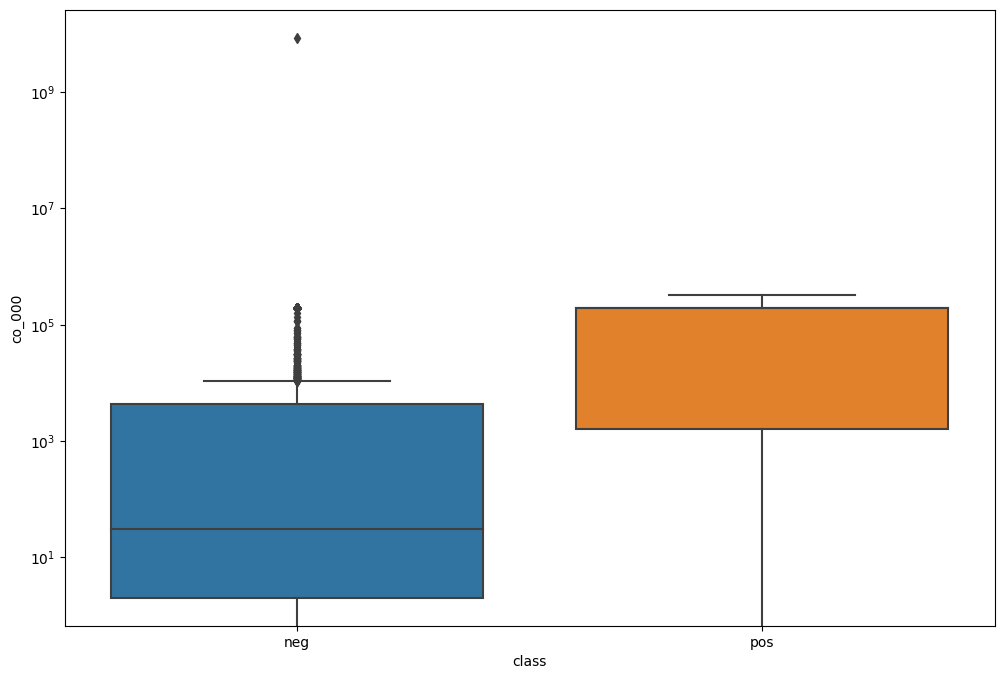

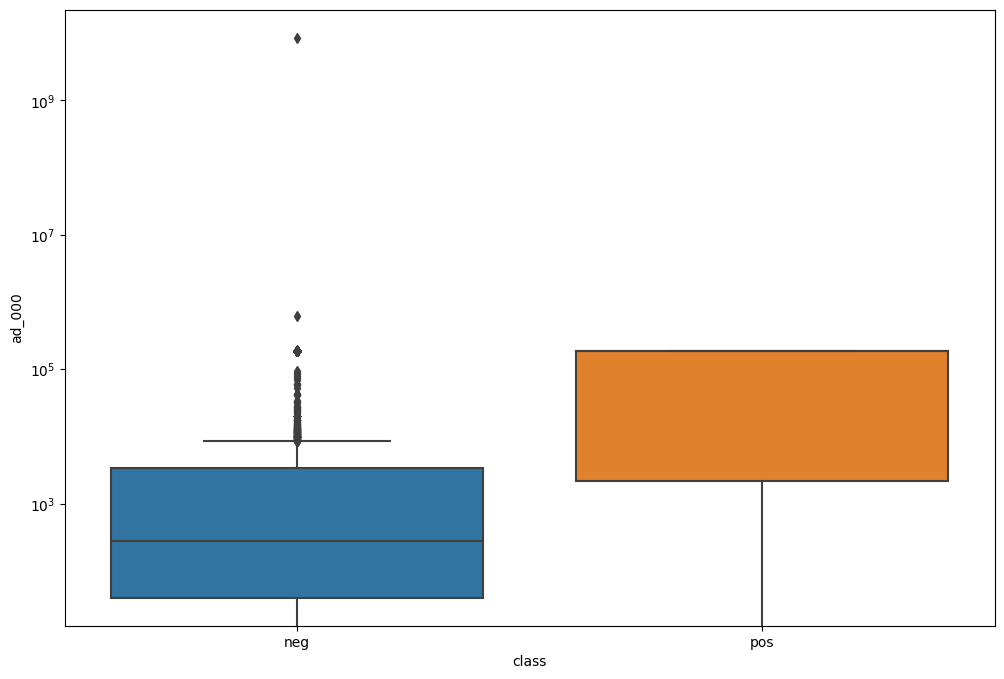

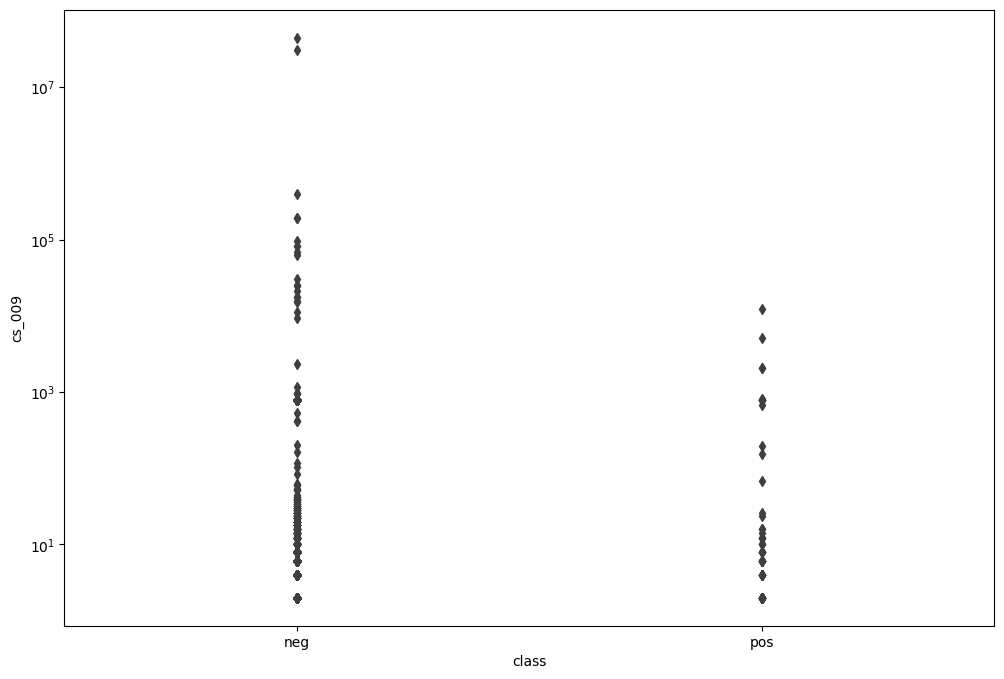

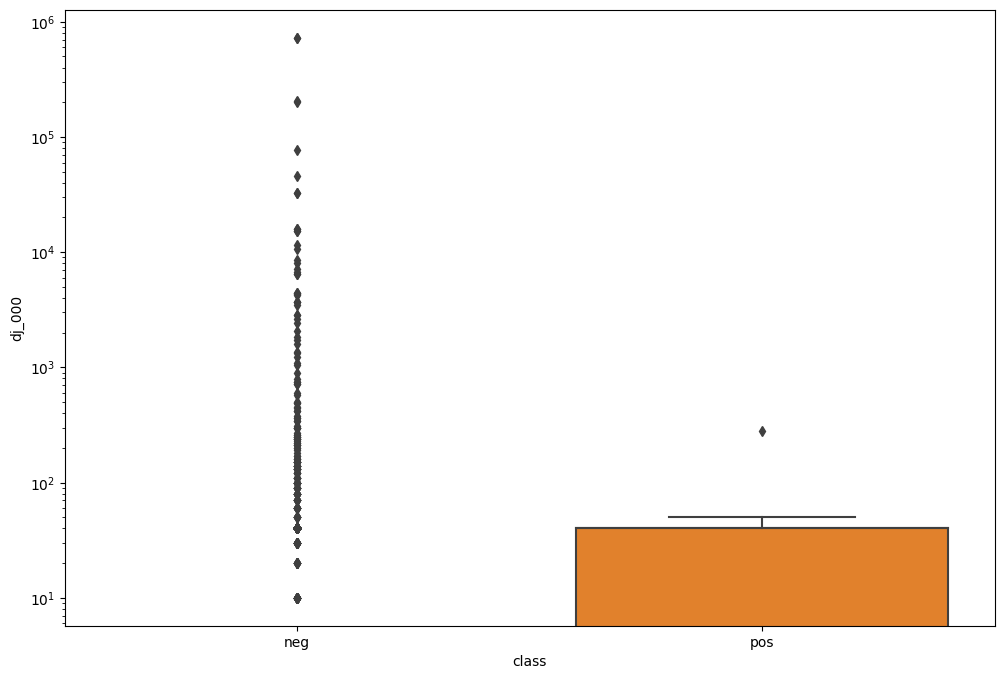

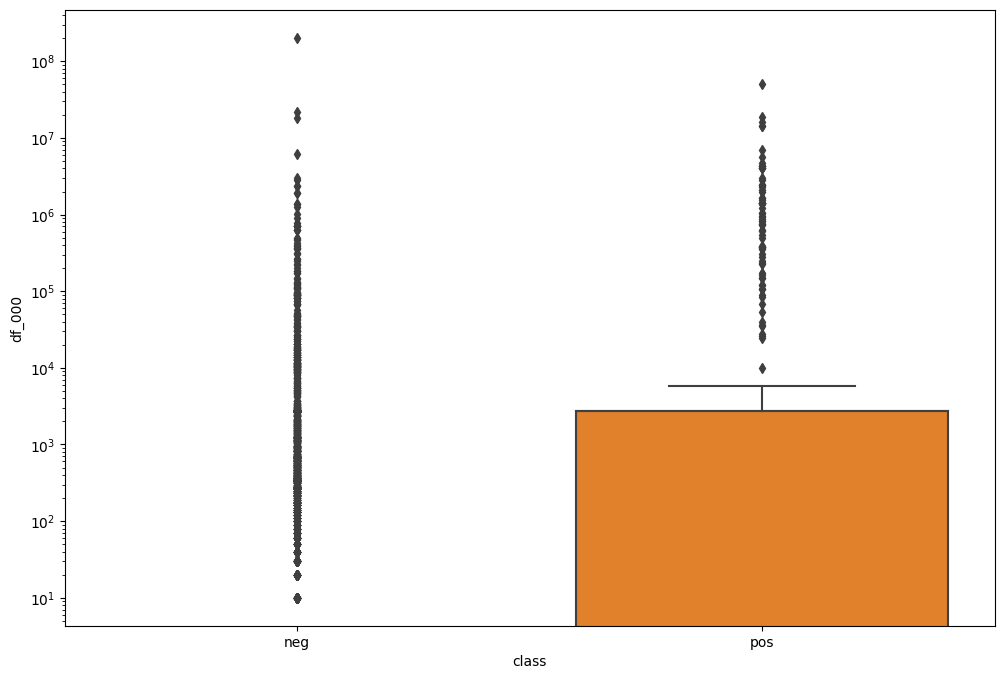

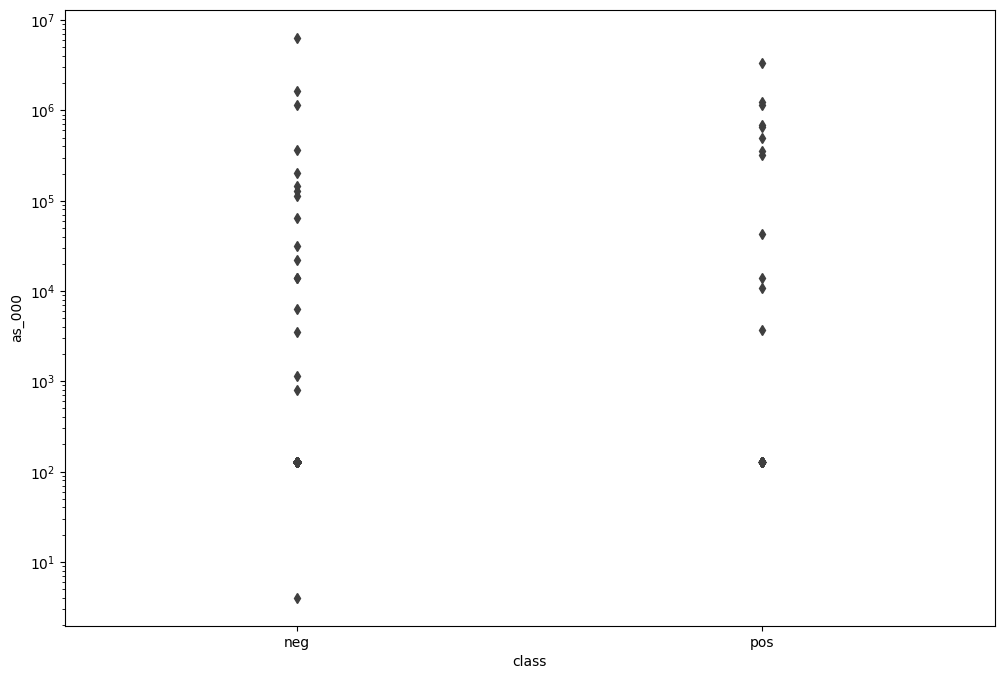

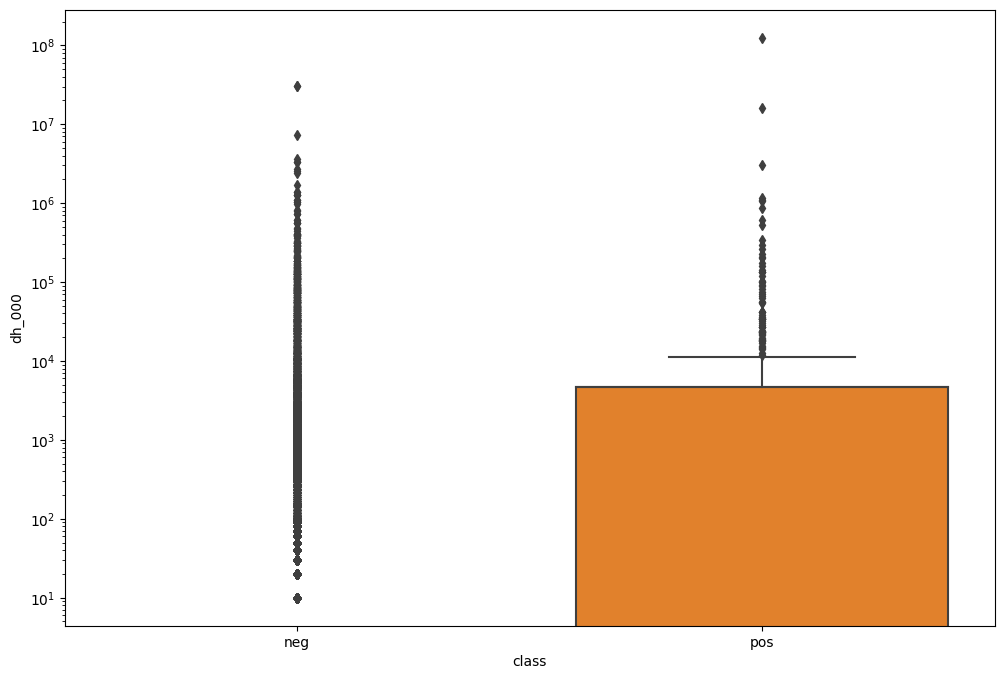

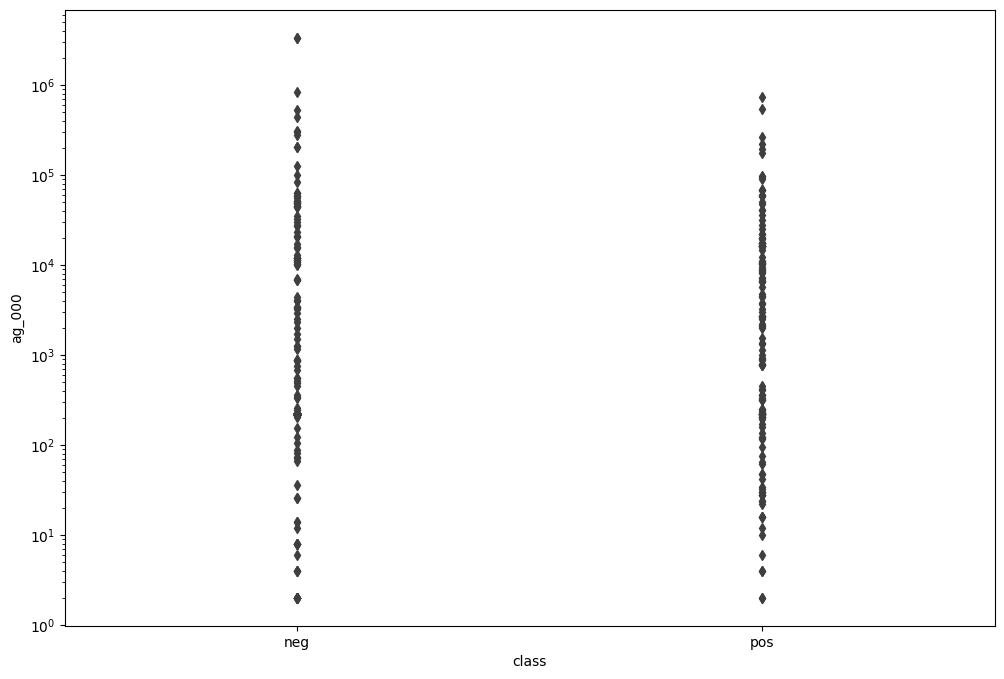

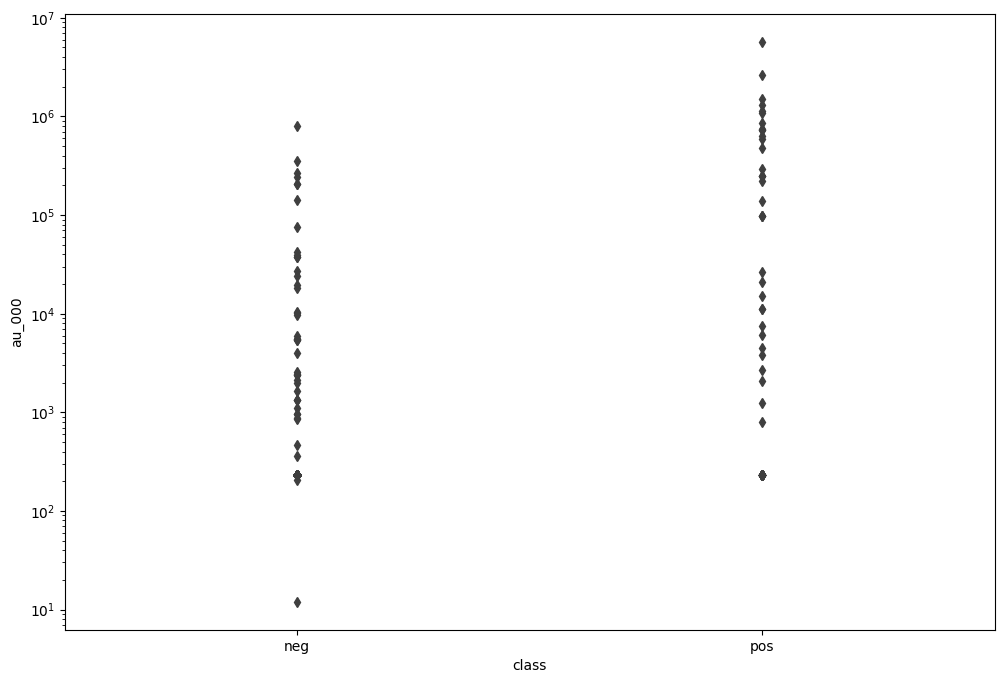

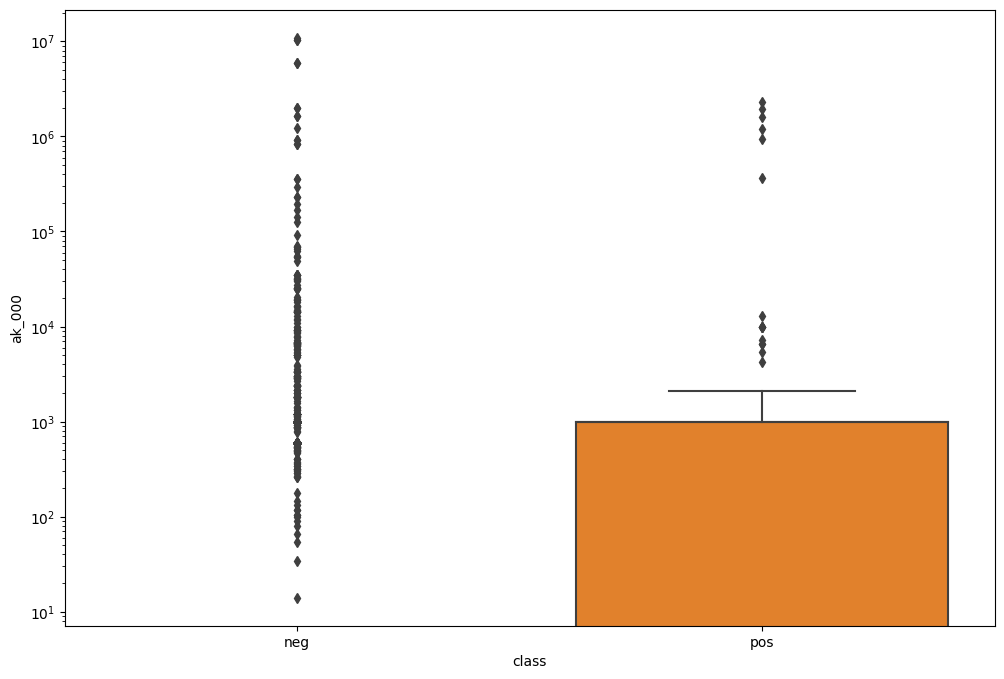

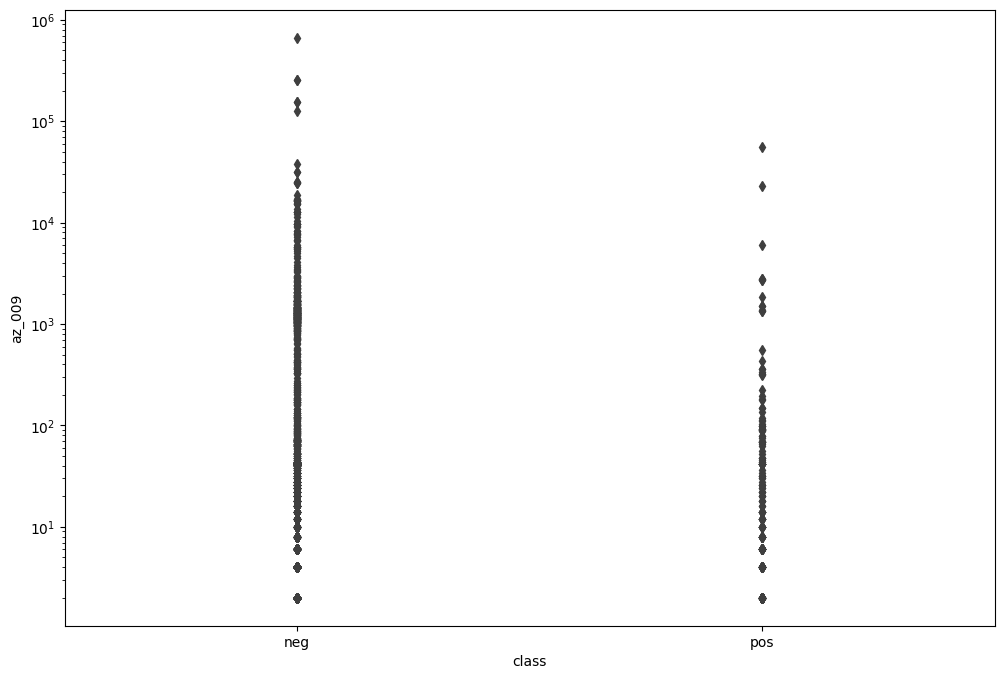

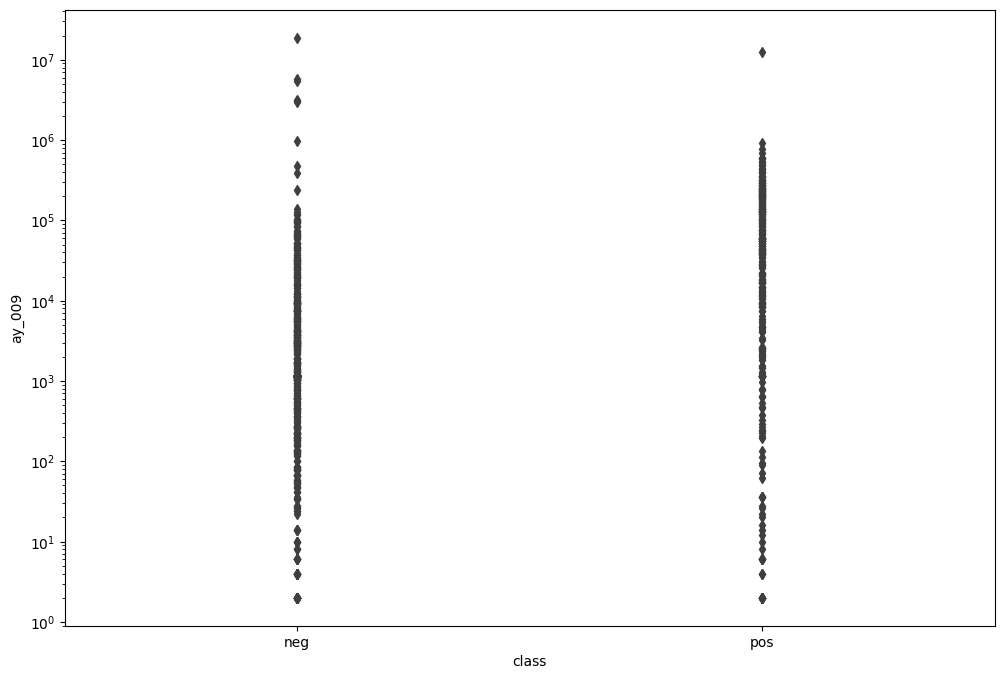

In [ ]:
for feature in top_features.index:
    plt.figure(figsize=(12, 8))
    box = sns.boxplot(x='class', y=feature, data=data_imp2)
    box.set(yscale = "log")
    plt.show()

### Conclusion from the scatter plots:
 I cannot draw conclusions about significance of those features, just by the scatter plots. We selected these features from the features with highest coefficient of variation. The scatterplot is not sufficient as the points in the scatterplots are spread out.

#### (v) Is this data set imbalanced?

In [ ]:
print("Labels in Train Set:")
print(y_train.value_counts())

print("\nLabels in Test Set:")
print(y_test.value_counts())


Labels in Train Set:
neg    59000
pos     1000
Name: class, dtype: int64

Labels in Test Set:
neg    15625
pos      375
Name: class, dtype: int64


Dataset is imbalanced. As we can see above, the number of neg data points is greater than the number of pos data points by 58,000 in the training set. We can also see that the number of pos data points is just 375 whereas the number of neg data points is 15625 in the test set.

### (c) Train a random forest

In [ ]:
y_train = (y_train == 'pos').astype(int)
y_test = (y_test == 'pos').astype(int)
# y_train_binary.head(30)

In [ ]:
# print(x_train2.iloc[:, :-1])
rf_classifier = RandomForestClassifier(max_depth = 5, random_state = 42, oob_score = True)
rf_classifier.fit(x_train2.iloc[:, :-1], y_train)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [ ]:
y_train_pred = rf_classifier.predict(x_train2.iloc[:, :-1])
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
y_test_pred = rf_classifier.predict(x_test2.iloc[:, :-1])
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

Training Set Report: 

Confusion Matrix: 

[[58976    24]
 [  432   568]]

 Training Error:  0.007600000000000051




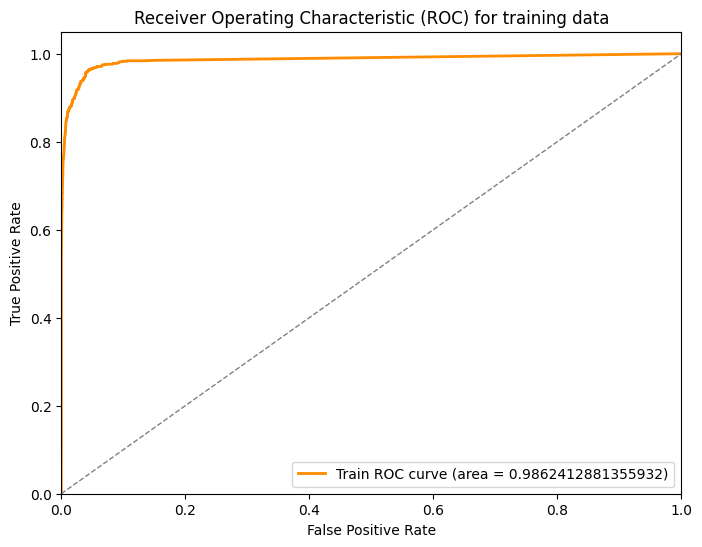

In [ ]:
y_scores_train = rf_classifier.predict_proba(x_train2.iloc[:, :-1])[:, 1]
y_scores_test = rf_classifier.predict_proba(x_test2.iloc[:, :-1])[:, 1]

# print("Train Score: ", y_scores_train)
# print("Test Score: ", y_scores_test)

fpr_train, tpr_train, _ = roc_curve(y_train, y_scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

training_acc = rf_classifier.score(x_train2.iloc[:, :-1], y_train)
testing_acc = rf_classifier.score(x_test2.iloc[:, :-1], y_test)
misclassification_train = 1 - rf_classifier.score(x_train2.iloc[:, :-1], y_train)
misclassification_test = 1 - rf_classifier.score(x_test2.iloc[:, :-1], y_test)

print("Training Set Report: \n")
print("Confusion Matrix: \n")
print(confusion_matrix_train)

print("\n Training Error: ", misclassification_train)
print("\n")


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = {})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for training data')
plt.legend(loc="lower right")
plt.show()

Testing Set Report: 

Confusion Matrix: 

[[15611    14]
 [  173   202]]

 Testing Error:  0.011687499999999962




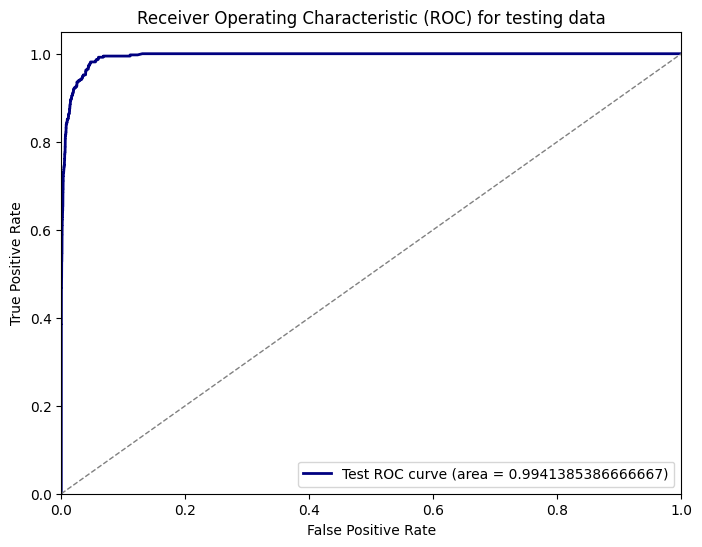

In [ ]:
print("Testing Set Report: \n")
print("Confusion Matrix: \n")
print(confusion_matrix_test)

print("\n Testing Error: ", misclassification_test)
print("\n")
plt.figure(figsize=(8, 6))

plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = {})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for testing data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
oob_error = 1 - rf_classifier.oob_score_
print("OOB ERROR: ", oob_error)
print("TESTING ERROR: ", misclassification_test)

OOB ERROR:  0.00928333333333331
TESTING ERROR:  0.011687499999999962


### (d) Research class imbalance in random forest

There are several techniques used to address class imbalance in random forests:

#### Class Weighting:

Implementations of random forests allow you to assign different weights to classes. This means that misclassifying a minority class instance will have a higher penalty than misclassifying a majority class instance. This can help the model give more importance to the minority class.

I will be using this method.

In [ ]:
rf_classifier = RandomForestClassifier(max_depth = 5, class_weight='balanced', random_state = 42, oob_score = True)
rf_classifier.fit(x_train2.iloc[:, :-1], y_train)

y_train_pred = rf_classifier.predict(x_train2.iloc[:, :-1])
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

y_test_pred = rf_classifier.predict(x_test2.iloc[:, :-1])
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

Training Set Report: 

Confusion Matrix: 

[[56610  2390]
 [   31   969]]

 Training Error:  0.04035




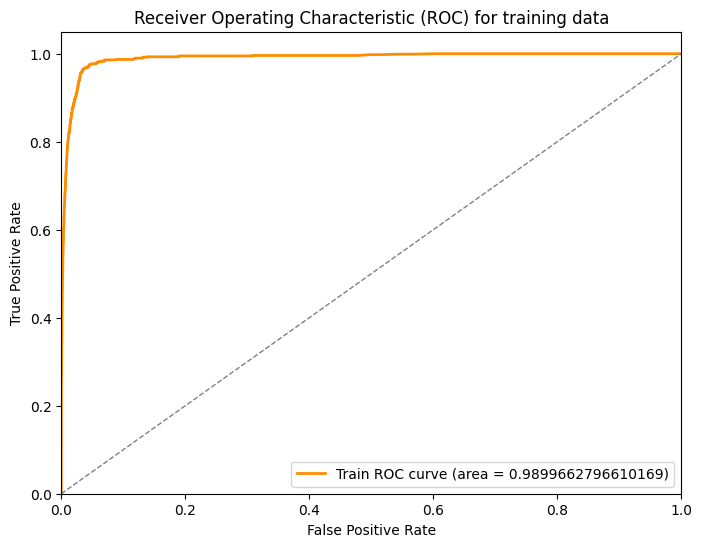

In [ ]:
y_scores_train = rf_classifier.predict_proba(x_train2.iloc[:, :-1])[:, 1]
y_scores_test = rf_classifier.predict_proba(x_test2.iloc[:, :-1])[:, 1]


fpr_train, tpr_train, _ = roc_curve(y_train, y_scores_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

misclassification_train = 1 - rf_classifier.score(x_train2.iloc[:, :-1], y_train)
misclassification_test = 1 - rf_classifier.score(x_test2.iloc[:, :-1], y_test)

print("Training Set Report: \n")
print("Confusion Matrix: \n")
print(confusion_matrix_train)

print("\n Training Error: ", misclassification_train)
print("\n")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = {})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for training data')
plt.legend(loc="lower right")
plt.show()

Testing Set Report: 

Confusion Matrix: 

[[15013   612]
 [   12   363]]

 Testing Error:  0.039000000000000035




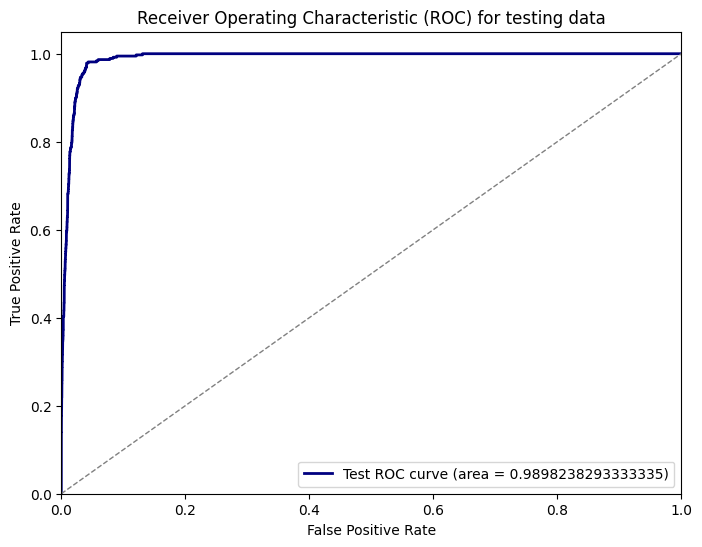

In [ ]:
print("Testing Set Report: \n")
print("Confusion Matrix: \n")
print(confusion_matrix_test)

print("\n Testing Error: ", misclassification_test)
print("\n")
plt.figure(figsize=(8, 6))

plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = {})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for testing data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
oob_error = 1 - rf_classifier.oob_score_
print("OOB ERROR: ", oob_error)
print("TESTING ERROR: ", misclassification_test)

OOB ERROR:  0.04156666666666664
TESTING ERROR:  0.039000000000000035


##### 1. When classes are imbalanced, if we take a look at the confusion matrix for the test set, we can see that the model makes good prediction over the neg class. It does not perform as well over the pos class though.

##### 2. After addressing class imbalance, we see that the model performs better over the pos class, as it correctly identifies more pos classes. The number of false negatives do increase a little though.



### (e) XGBoost and Model Trees

In [ ]:
xgb_classifier = XGBClassifier(objective = 'binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
num_folds = 5
param_grid = {'alpha': [ 0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(xgb_classifier,
                           param_grid,
                            cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42),
                            scoring = "accuracy")

In [ ]:
grid_search.fit(x_train2.iloc[:, :-1], y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type...
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
best_alpha = grid_search.best_params_['alpha']
best_alpha

0.01

In [ ]:
final_xgb_classifier = XGBClassifier(
    objective = 'binary:logistic', colsample_bytree = 0.3,
                      learning_rate = 0.1, max_depth = 5, use_label_encoder = False,
    alpha=best_alpha,
    random_state=42
)
final_xgb_classifier.fit(x_train2.iloc[:, :-1], y_train)


XGBClassifier(alpha=0.01, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

y_train_pred = final_xgb_classifier.predict(x_train2.iloc[:, :-1])
y_test_pred = final_xgb_classifier.predict(x_test2.iloc[:, :-1])

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

y_train_prob = final_xgb_classifier.predict_proba(x_train2.iloc[:, :-1])[:, 1]
y_test_prob = final_xgb_classifier.predict_proba(x_test2.iloc[:, :-1])[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)


Training Set Report: 

Confusion Matrix: 

[[58996     4]
 [   98   902]]
n Training Accuracy:  0.9983

 Training Error:  0.0017000000000000348




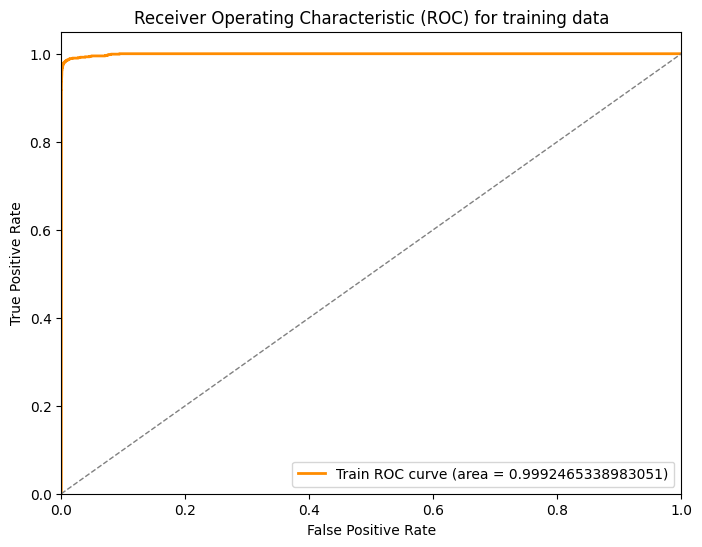

In [ ]:

print("Training Set Report: \n")
print("Confusion Matrix: \n")
print(train_confusion_matrix)

print("n Training Accuracy: ", train_accuracy)
print("\n Training Error: ", 1 - train_accuracy)
print("\n")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = {})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for training data')
plt.legend(loc="lower right")
plt.show()

Test Set Report: 

Confusion Matrix: 

[[15612    13]
 [   96   279]]
n Test Accuracy:  0.9931875

 Test Error:  0.006812499999999999




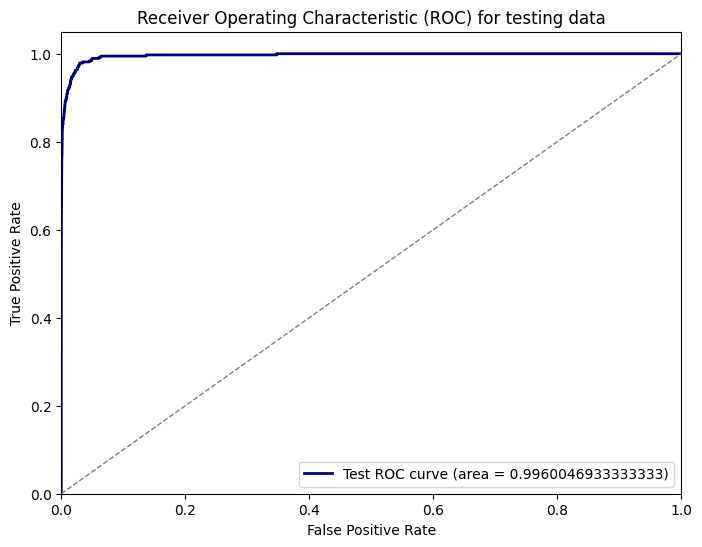

In [ ]:
print("Test Set Report: \n")
print("Confusion Matrix: \n")
print(test_confusion_matrix)

print("n Test Accuracy: ", test_accuracy)
print("\n Test Error: ", 1 - test_accuracy)
print("\n")
plt.figure(figsize=(8, 6))

plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = {})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for testing data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("\n Training Error: ", 1 - train_accuracy)
print("\n Test Error: ", 1 - test_accuracy)


 Training Error:  0.0017000000000000348

 Test Error:  0.006812499999999999


### (f)  SMOTE to pre-process data

In [ ]:
param_grid = {
    'xgbclassifier__alpha': [ 0.001, 0.01, 0.1, 1, 10, 100]
}

num_folds = 5

xgb_classifier = XGBClassifier(
    objective = 'binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, random_state=42)
model_pipeline = imbpipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgbclassifier', xgb_classifier)
])

# pipeline
grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=69),
    scoring='accuracy'
)

grid_search.fit(x_train2.iloc[:, :-1], y_train)

best_alpha = grid_search.best_params_['xgbclassifier__alpha']
best_alpha

print("best_alpha: ", best_alpha)


best_alpha:  0.1


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train2.iloc[:, :-1], y_train)
print("Before using SMOTE: \n")
print(y_train.value_counts())

print("After using SMOTE: \n")
print(y_resampled.value_counts())

Before using SMOTE: 

0    59000
1     1000
Name: class, dtype: int64
After using SMOTE: 

0    59000
1    59000
Name: class, dtype: int64


In [ ]:
final_xgb_classifier = XGBClassifier(
    objective = 'binary:logistic', colsample_bytree = 0.3,
                      learning_rate = 0.1, max_depth = 5, use_label_encoder = False,
    alpha=best_alpha,
    random_state=42
)
final_xgb_classifier.fit(X_resampled, y_resampled)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred = final_xgb_classifier.predict(X_resampled)
y_test_pred = final_xgb_classifier.predict(x_test2.iloc[:, :-1])

train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_confusion_matrix = confusion_matrix(y_resampled, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

y_train_prob = final_xgb_classifier.predict_proba(X_resampled)[:, 1]
y_test_prob = final_xgb_classifier.predict_proba(x_test2.iloc[:, :-1])[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_resampled, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)


Training Set Report: 

Confusion Matrix: 

[[58641   359]
 [   92 58908]]
n Training Accuracy:  0.996177966101695

 Training Error:  0.003822033898305044




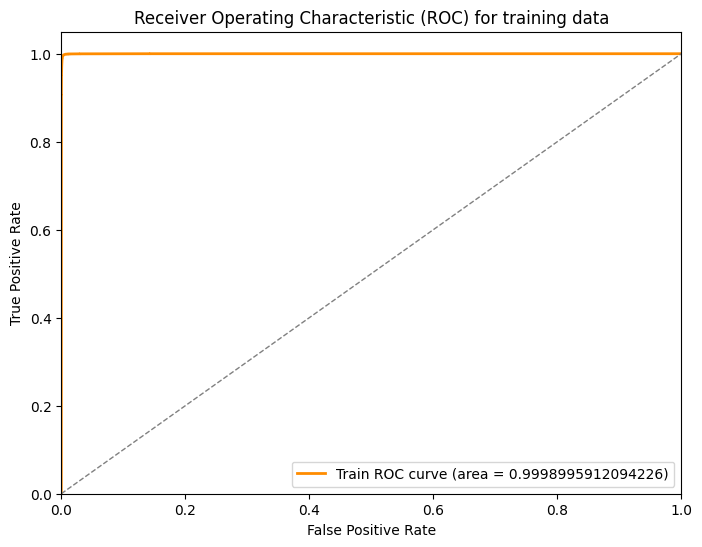

In [ ]:
print("Training Set Report: \n")
print("Confusion Matrix: \n")
print(train_confusion_matrix)

print("n Training Accuracy: ", train_accuracy)
print("\n Training Error: ", 1 - train_accuracy)
print("\n")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = {})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for training data')
plt.legend(loc="lower right")
plt.show()

Test Set Report: 

Confusion Matrix: 

[[15498   127]
 [   48   327]]
n Test Accuracy:  0.9890625

 Test Error:  0.010937500000000044




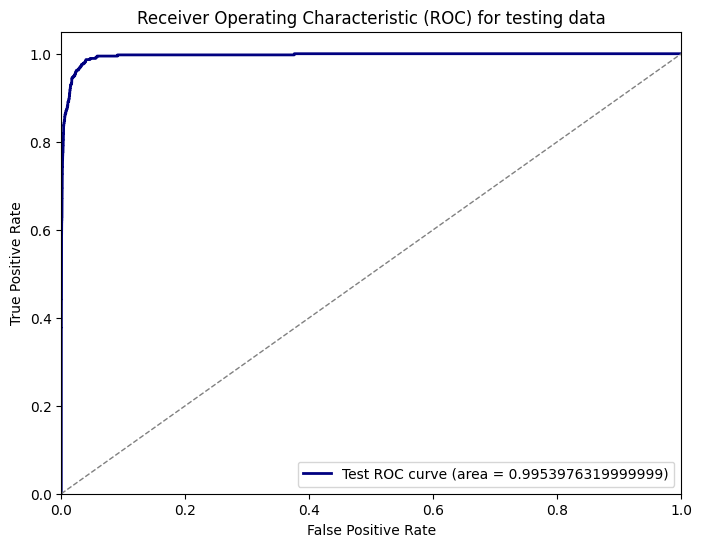

In [ ]:
print("Test Set Report: \n")
print("Confusion Matrix: \n")
print(test_confusion_matrix)

print("n Test Accuracy: ", test_accuracy)
print("\n Test Error: ", 1 - test_accuracy)
print("\n")
plt.figure(figsize=(8, 6))

plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = {})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for testing data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("\n Training Error: ", 1 - train_accuracy)
print("\n Test Error: ", 1 - test_accuracy)


 Training Error:  0.003822033898305044

 Test Error:  0.010937500000000044


## Comparison of the uncompensated case with SMOTE case
Looking at the test confusion matrices of both methods, we can see that after using SMOTE, the model is able to predict the pos class better than before. It correctly classified more pos classes (true positives increased), but at the same time the false negatives increased too.  